In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [2]:
import pickle

In [3]:
from typing import List, Dict, Any, Tuple

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
import colorcet

In [6]:
import glob
from tqdm import tqdm
import json

In [7]:
from bertopic import BERTopic

In [8]:
# Set up LaTeX fonts
#plt.style.use(['no-latex'])
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

In [9]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_2.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding: Dict[str, Dict] = pickle.load(file)

In [110]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_full_document.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_8k: Dict[str, Dict] = pickle.load(file)

In [10]:
documents: List = list(doc2embedding.keys())
embeddings: np.array = np.array(list(doc2embedding.values()))

In [250]:
# documents_8k: List = [
#     doc for doc in list(doc2embedding_8k.keys())
#     if doc in documents
# ]
# embeddings_8k: np.array = np.array(
#     [
#         emb for doc, emb in doc2embedding_8k.items()
#         if doc in documents
#     ]
# )

In [11]:
# to get categories, read JSON files
json_files: List = [
    json_file_id.split('/')[-1][:-5]
    for json_file_id in glob.glob('../data/json_files/*.json')
]


doc2json: Dict[str, Dict] = {}

for doc in tqdm(json_files):
    # open the file in read mode
    file_path = "../data/json_files/" + doc + ".json"
    with open(file_path, "r", encoding='utf-8',) as file:
        # Load the JSON data
        doc2json[doc] = json.load(file)

  0%|          | 0/17486 [00:00<?, ?it/s]

100%|██████████| 17486/17486 [00:00<00:00, 77198.92it/s]


In [12]:
summaries: List[str] = [
    doc2json[doc]["tldr"]
    for doc in documents
]

In [182]:
topic_sentences: List[str] = [
    ' '.join(doc2json[doc]["topics"])
    for doc in documents
]

# topic_sentences_8k: List[str] = [
#     ' '.join(doc2json[doc]["topics"])
#     for doc in documents_8k
# ]

# summaries_8k: List[str] = [
#     doc2json[doc]["tldr"]
#     for doc in documents_8k
# ]

In [219]:
# topic_distr, topic_token_distr = topic_model.approximate_distribution(topic_sentences, calculate_tokens=True) #topic_distr,  = topic_model.approximate_distribution(docs, calculate_tokens=True)

100%|██████████| 18/18 [00:00<00:00, 20.60it/s]


In [224]:
# len(topic_token_distr[0])

10

In [213]:
topic_sentences[55]

'Archaeology Lincolnshire History Geology Ralph Thoresby'

In [214]:
topic_distr[55]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [258]:
topic_model = BERTopic(
    verbose=True,
    min_topic_size=50,
    #nr_topics="auto",
)

topics, probs = topic_model.fit_transform(
    topic_sentences, 
    embeddings,
)

# Reduce outliers
topics = topic_model.reduce_outliers(topic_sentences, topics)
topic_model.update_topics(topic_sentences, topics=topics)

topic_set = set(topics)

color_set = sns.color_palette(
    colorcet.glasbey,
    n_colors=len(topic_set)
)

topic2color = {
    topic: color
    for topic, color in zip(topic_set, color_set)
}

topic2color[-1] = (0.6, 0.6, 0.6)

topic_names = topic_model.get_topic_info()['Name'].values

topic2name = {
    int(t_name[:t_name.find('_')]): t_name
    for t_name in topic_names
}

2024-05-23 13:29:37,646 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-23 13:29:47,783 - BERTopic - Dimensionality - Completed ✓
2024-05-23 13:29:47,784 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-23 13:29:48,169 - BERTopic - Cluster - Completed ✓
2024-05-23 13:29:48,174 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-23 13:29:48,345 - BERTopic - Representation - Completed ✓
100%|██████████| 7/7 [00:00<00:00, 41.62it/s]
2024-05-23 13:29:48,693 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [259]:
topic_model.get_topic_info()

Topic  Count                                          Name  \
0       0    828   0_mathematical_geometry_equations_functions   
1       1    604  1_magnetic_magnetism_declination_terrestrial   
2       2    572                2_medical_surgery_case_urology   
3       3    532     3_meteorology_weather_climate_atmospheric   
4       4    655       4_chemistry_compounds_organic_reactions   
..    ...    ...                                           ...   
74     74     98     74_crystallography_crystal_xray_selenates   
75     75    161             75_weight_atomic_chemical_weights   
76     76    109               76_geology_rock_rocks_formation   
77     77    101     77_eclipses_satellites_satellite_jupiters   
78     78     55    78_scientific_journals_literature_research   

                                       Representation  \
0   [mathematical, geometry, equations, functions,...   
1   [magnetic, magnetism, declination, terrestrial...   
2   [medical, surgery, case, urology, study, medic...   
3   [meteorology, weather, climate, atmospheric, b...   
4   [chemistry, compounds, organic, reactions, che...   
..                                                ...   
74  [crystallography, crystal, xray, selenates, st...   
75  [weight, atomic, chemical, weights, silver, an...   
76  [geology, rock, rocks, formation, igneous, ire...   
77  [eclipses, satellites, satellite, jupiters, de...   
78  [scientific, journals, literature, research, p...   

                                  Representative_Docs  
0   [Geometry Algebraic Geometry Cubic Surfaces Ma...  
1   [Magnetism Geophysics Magnetic Declination Mag...  
2   [Urology Bladder Stones Kidney Stones Medical ...  
3   [Meteorology Atmospheric Pressure Climate Temp...  
4   [Organic Chemistry Ammonia Derivatives Alkaloi...  
..                                                ...  
74  [Crystallography Selenates Nickel Compounds Po...  
75  [Atomic Weight Chlorine Hydrogen Chemical Anal...  
76  [Geology Ireland Natural Wonders Stone Structu...  
77  [Astronomy Eclipses Jupiter's Satellites Longi...  
78  [Scientific Journals Scientific Literature Per...  

[79 rows x 5 columns]

In [260]:
# type(topic_sentences), type(embeddings_8k)

In [261]:
# topics_8k, probs_8k = topic_model.fit_transform(
#     topic_sentences_8k, 
#     embeddings_8k,
# )

# topic_set_8k = set(topics_8k)

# color_set_8k = sns.color_palette(
#     colorcet.glasbey,
#     n_colors=len(topic_set_8k)
# )

# topic2color = {
#     topic: color
#     for topic, color in zip(topic_set_8k, color_set_8k)
# }

# topic2color[-1] = (0.6, 0.6, 0.6)

# topic_names = topic_model.get_topic_info()['Name'].values

# topic2name = {
#     int(t_name[:t_name.find('_')]): t_name
#     for t_name in topic_names
# }

In [262]:
hierarchical_topics = topic_model.hierarchical_topics(topic_sentences)

100%|██████████| 78/78 [00:00<00:00, 191.65it/s]


In [263]:
article_titles = [
    doc2json[doc]["article_id"] + ': ' + doc2json[doc]["revised_title"] + '. Keyterms: ' + ', '.join(doc2json[doc]["topics"])
    for doc in documents
]
topic_model.visualize_documents(article_titles, reduced_embeddings=tsne_embeddings)


In [233]:
#topic_model.visualize_heatmap(n_clusters=29)

In [199]:
print(topic_model.get_topic_tree(hierarchical_topics))

.
├─plant_anatomy_physiology_medical_development
│    ├─medical_surgery_nerve_blood_system
│    │    ├─medical_surgery_treatment_case_medicine
│    │    │    ├─■──trypanosoma_diseases_trypanosomiasis_trypanosome_glossina ── Topic: 24
│    │    │    └─■──medical_surgery_treatment_case_medicine ── Topic: 3
│    │    └─nerve_muscle_blood_neuroscience_neuroanatomy
│    │         ├─■──nerve_muscle_neuroscience_neuroanatomy_brain ── Topic: 2
│    │         └─■──blood_coagulation_respiration_components_plasma ── Topic: 32
│    └─plant_anatomy_fossil_botany_biology
│         ├─plant_botany_plants_bacterial_physiology
│         │    ├─■──bacterial_plant_microbiology_photosynthesis_microbial ── Topic: 17
│         │    └─plant_botany_plants_paleobotany_fossil
│         │         ├─■──plant_botany_tree_classification_physiology ── Topic: 15
│         │         └─■──paleobotany_fossil_plants_plant_coal ── Topic: 23
│         └─paleontology_biology_anatomy_insect_reproduction
│              ├─■──pa

In [264]:
topic_model.visualize_hierarchy()

In [277]:
topic_model.visualize_barchart(top_n_topics=79, n_words=10)

In [268]:
topic2label

{0: '0_mathematical_geometry_equations_functions_differential',
 1: '1_magnetic_magnetism_declination_terrestrial_compass',
 2: '2_medical_surgery_case_urology_study',
 3: '3_meteorology_weather_climate_atmospheric_barometer',
 4: '4_chemistry_compounds_organic_reactions_chemical',
 5: '5_refraction_light_optics_optical_polarization',
 6: '6_discharge_ionization_rays_electric_radioactivity',
 7: '7_iron_magnetic_magnetism_steel_materials',
 8: '8_muscle_heart_nerve_cardiology_muscular',
 9: '9_spectroscopy_spectra_spectrum_spectral_atomic',
 10: '10_roman_ancient_archaeology_history_inscriptions',
 11: '11_botany_plant_geography_classification_taxonomy',
 12: '12_tidal_tides_oceanography_tide_hydrography',
 13: '13_paleontology_fossil_reptiles_extinct_dentition',
 14: '14_ice_temperature_freezing_measurement_thermometry',
 15: '15_electrochemistry_voltaic_electrolysis_electromotive_battery',
 16: '16_biology_zoology_anatomy_developmental_mollusks',
 17: '17_astronomical_celestial_star_

In [275]:
topic2label = {
    int(t_lable.split()[0]): ', '.join(t_lable.split()[0:])
    for t_lable in topic_model.generate_topic_labels(
        nr_words=20, 
        separator=" "
    )
}

topic2label

{0: '0, mathematical, geometry, equations, functions, differential, algebraic, calculus, algebra, series, theory',
 1: '1, magnetic, magnetism, declination, terrestrial, compass, variation, observations, field, sunspots, solar',
 2: '2, medical, surgery, case, urology, study, medicine, pathology, stones, treatment, kidney',
 3: '3, meteorology, weather, climate, atmospheric, barometer, temperature, pressure, thermometer, wind, science',
 4: '4, chemistry, compounds, organic, reactions, chemical, acid, inorganic, synthesis, ammonia, derivatives',
 5: '5, refraction, light, optics, optical, polarization, dispersion, polarized, refractive, reflection, index',
 6: '6, discharge, ionization, rays, electric, radioactivity, gas, cathode, radiation, radium, vacuum',
 7: '7, iron, magnetic, magnetism, steel, materials, properties, hysteresis, magnetization, stress, induction',
 8: '8, muscle, heart, nerve, cardiology, muscular, physiology, contraction, neurophysiology, nervous, electrophysiolog

In [276]:
tsne = TSNE(n_components=2, perplexity=100, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

In [21]:
tsne_embeddings = tsne.fit_transform(embeddings)

In [133]:
tsne_embeddings_8k = tsne.fit_transform(embeddings_8k)

In [101]:
def get_category_centroids(
        embeddings_2D: np.array, # 2D tsne embeddings
        category_list: List[str]           # list of categories
    ) -> Dict[str, np.array]:    # return dict of category centroids

    cateogry_embeddings = defaultdict(list)

    for cat, tsne_emb in zip(category_list, embeddings_2D):
        cateogry_embeddings[cat].append(tsne_emb)

    category_centroids = {}

    for cat, embeddings in cateogry_embeddings.items():
        centroid = np.median(embeddings, axis=0)
        category_centroids[cat] = centroid

    return category_centroids

In [106]:
def plot_embedding_2D(
        embeddings_2D: np.array, # 2D tsne embeddings
        category_list: List[str],          # list of categories 
        with_captions: bool = True         # show category captions  
    ) -> None:                             # show plot, return None  


    colors: Dict[str, str] = [
        topic2color[cat] for cat in category_list
    ]
    
    # Create a scatter plot to visualize the t-SNE embeddings
    plt.figure(figsize=(12, 12))

    scatter = plt.scatter(
        embeddings_2D[:, 0], 
        embeddings_2D[:, 1], 
        alpha=0.25, 
        c=colors,
        marker='o',
        s=18
    )

    category_centroids = get_category_centroids(
        embeddings_2D, 
        category_list
    )


    handles = [
        plt.Line2D(
            [],
            [],
            marker='o',
            color=topic2color[cat], 
            linestyle='', 
            markersize=8,
            label=topic2label[cat]
        ) for cat in sorted(list(category_centroids.keys())) 
        if cat != 'Other'
    ]

    if with_captions:

        for cat, centroid in category_centroids.items():

            if cat == "Other":
                continue

            #rand_int = random.randint(-5, 5)

            plt.text(
                centroid[0], #- 15, 
                centroid[1], #- rand_int, 
                cat, #r"${{{}}}$".format(category2text[cat]), 
                fontdict=dict(fontsize=24, fontweight='normal', color='black'), 
                bbox=dict(
                    facecolor=topic2color[cat], 
                    alpha=0.5, 
                    linewidth=0, 
                    boxstyle='round,pad=0.1'
                    )
                )

    plt.legend(
        handles=handles, 
        title="", 
        fontsize=18, 
        framealpha=0,
        #loc='lower center',
        loc='upper left', 
        #bbox_to_anchor=(0.5, -0.25), 
        bbox_to_anchor=(1, 1), 
        #ncols=3,
        ncols=1,
    )


    plt.title('t-SNE projections', fontsize=16)
    #plt.xlabel('t-SNE Dimension 1')
    #plt.ylabel('t-SNE Dimension 2')
    #plt.ylim(-100, 100)
    #plt.xlim(-110, 110)

    plt.show()    

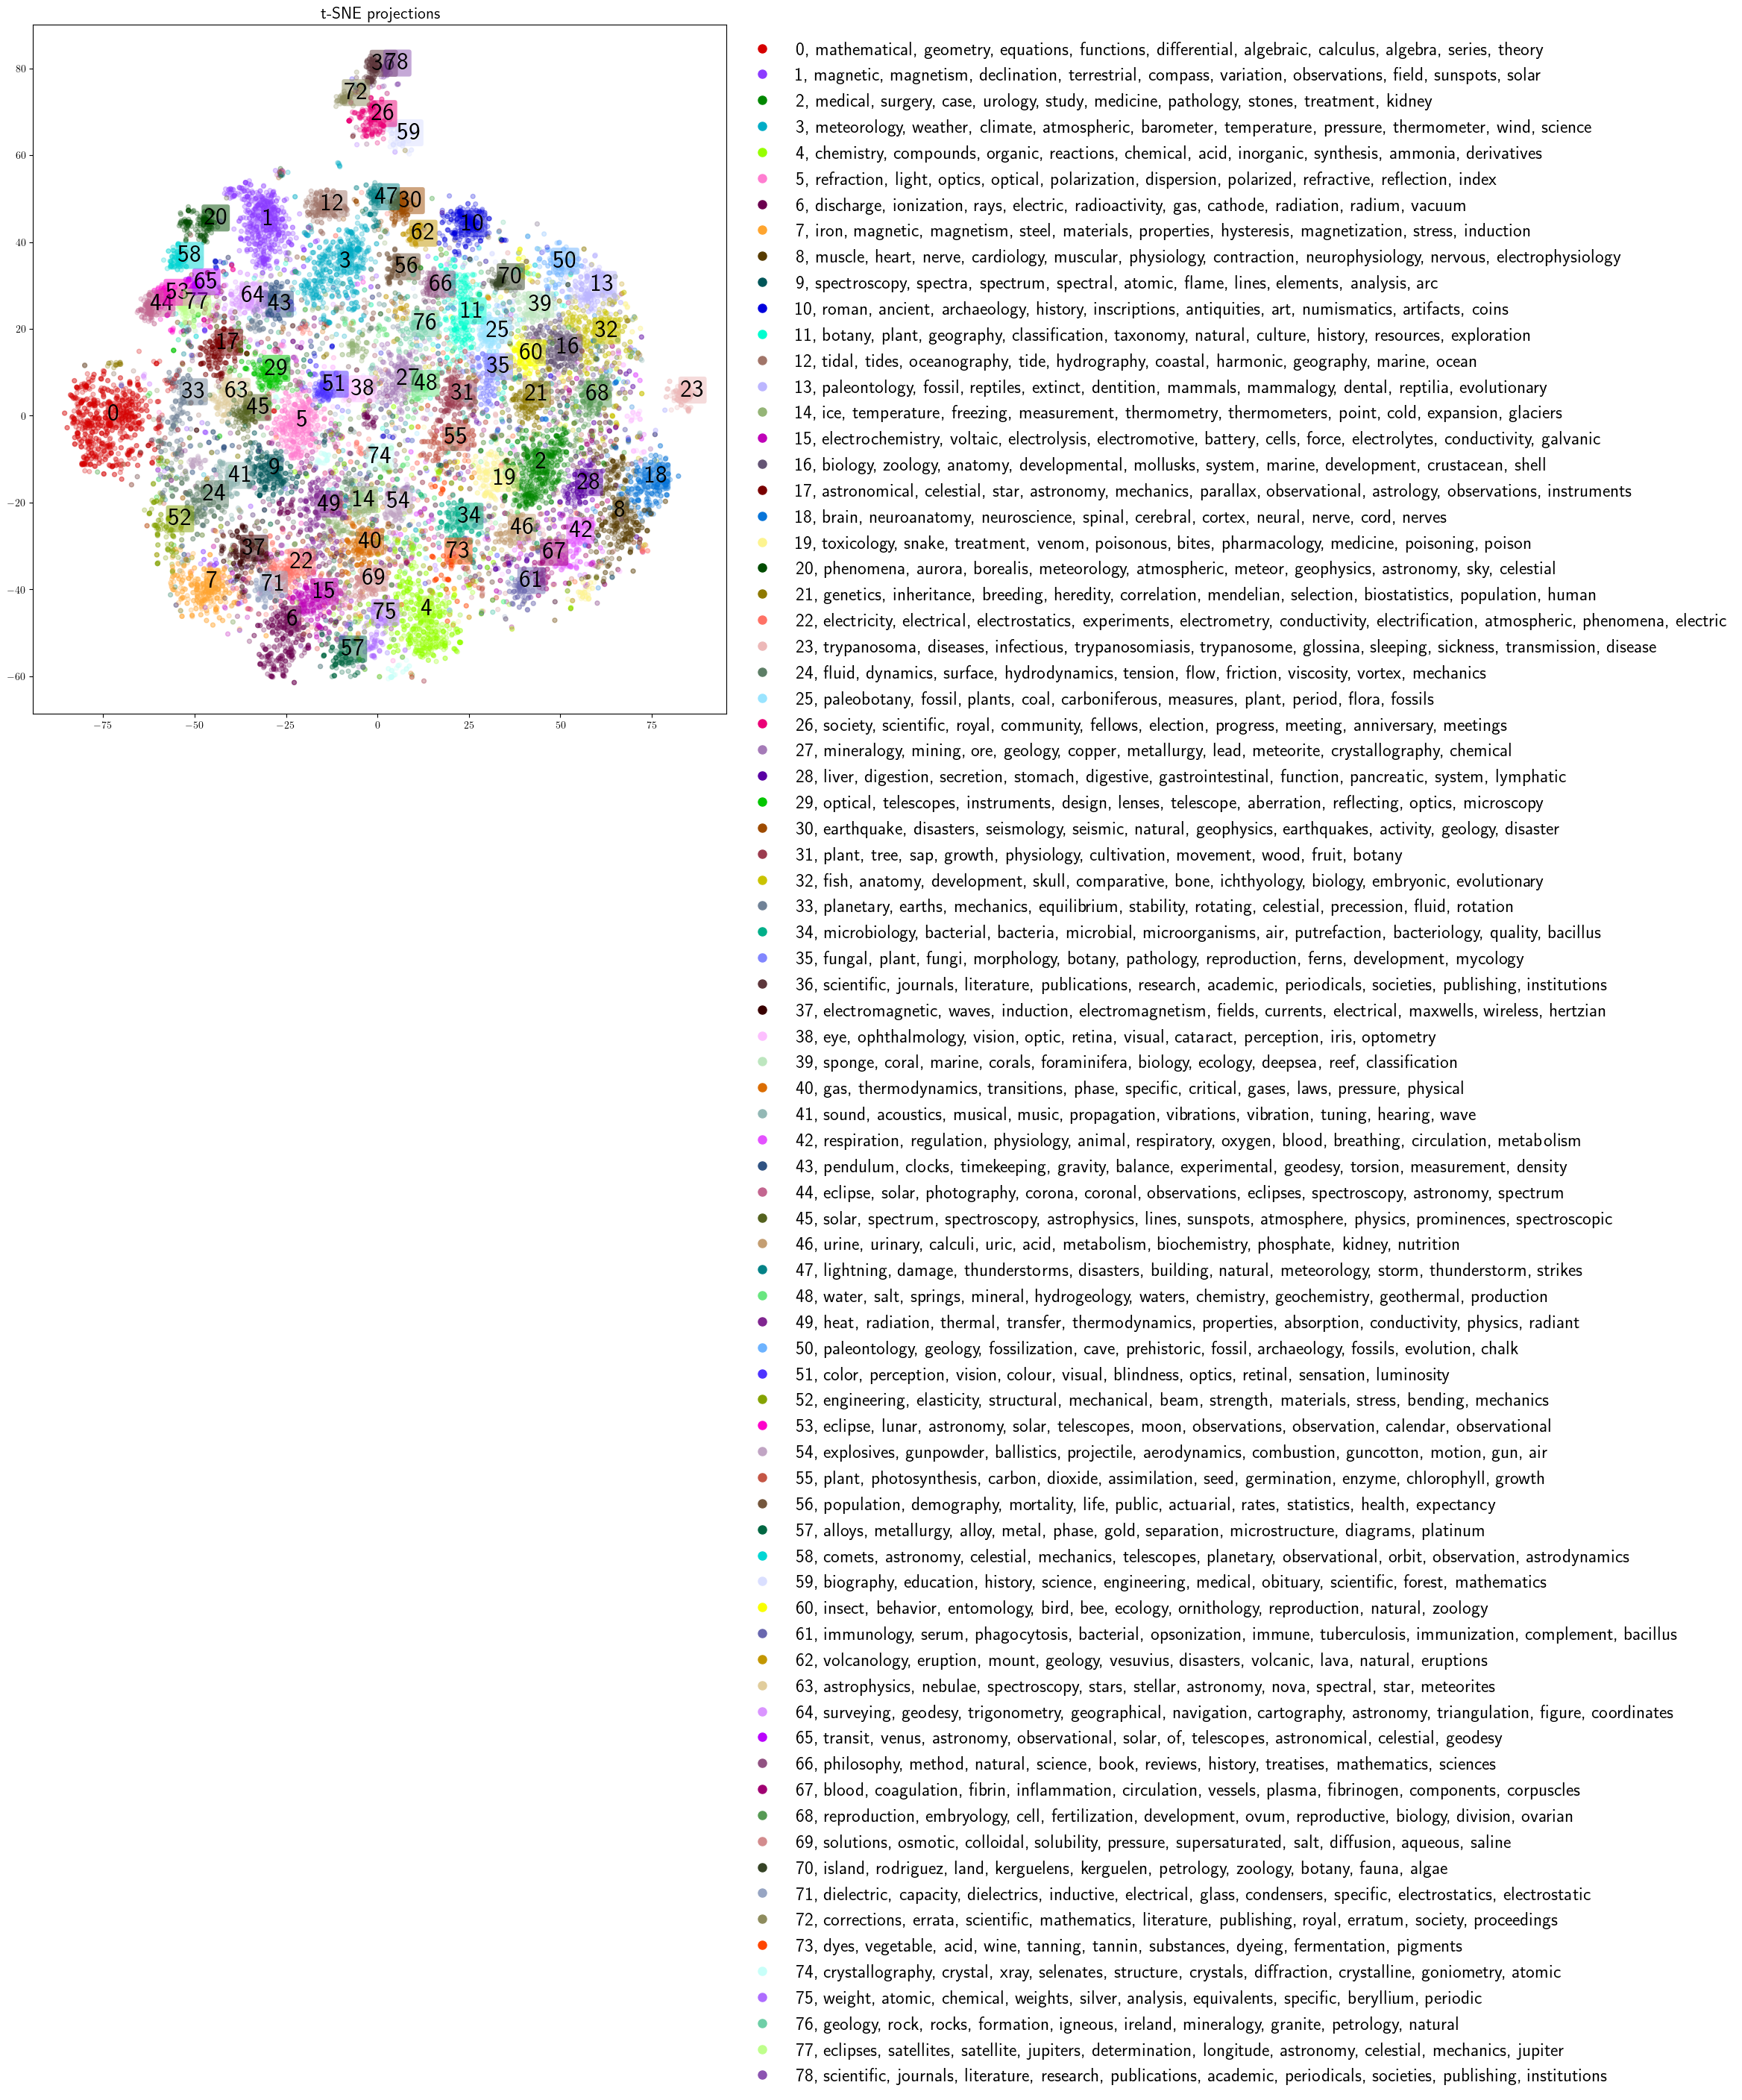

In [274]:
plot_embedding_2D(tsne_embeddings, topics, with_captions=True)

In [132]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0      -1   6250                   -1_anatomy_chemical_of_chemistry   
1       0   1365         0_electrical_electricity_magnetic_electric   
2       1    826           1_nerve_muscle_neuroscience_neuroanatomy   
3       2    801        2_mathematical_geometry_equations_functions   
4       3    682                   3_medical_surgery_treatment_case   
5       4    571            4_chemistry_organic_compounds_reactions   
6       5    520       5_magnetic_magnetism_declination_terrestrial   
7       6    472                  6_heat_thermodynamics_thermal_ice   
8       7    408          7_meteorology_weather_climate_atmospheric   
9       8    388                   8_insect_behavior_biology_marine   
10      9    387                9_roman_ancient_archaeology_history   
11     10    348               10_mineralogy_geology_mining_mineral   
12     11    343                   11_optics_color_light_refraction   
13     12    336     12_bacterial_plant_microbiology_photosynthesis   
14     13    317               13_paleontology_fossil_skull_anatomy   
15     14    310                14_plant_botany_tree_classification   
16     15    291         15_scientific_journals_literature_research   
17     16    289               16_fluid_dynamics_mechanics_friction   
18     17    236          17_spectroscopy_spectra_spectrum_spectral   
19     18    198        18_reproduction_development_embryology_ovum   
20     19    174            19_tidal_tides_oceanography_hydrography   
21     20    163           20_optical_lenses_telescopes_instruments   
22     21    157              21_society_scientific_royal_community   
23     22    148           22_transit_venus_astronomy_observational   
24     23    136                 23_paleobotany_fossil_plants_plant   
25     24    131  24_trypanosoma_diseases_trypanosomiasis_trypan...   
26     25    130       25_astronomical_astronomy_celestial_parallax   
27     26    125         26_earthquake_disasters_seismology_natural   
28     27    125            27_pendulum_geodesy_standards_surveying   
29     28    113         28_biography_history_scientific_obituaries   
30     29    110        29_astrophysics_spectroscopy_stars_spectrum   
31     30    101           30_aurora_borealis_phenomena_meteorology   
32     31     98        31_lightning_damage_thunderstorms_disasters   
33     32     95            32_comets_astronomy_celestial_mechanics   
34     33     91                   33_eclipse_astronomy_lunar_solar   
35     34     90                   34_alloys_metallurgy_alloy_phase   
36     35     84            35_population_demography_mortality_life   
37     36     77                    36_eclipse_solar_corona_coronal   

                                       Representation  \
0   [anatomy, chemical, of, chemistry, astronomy, ...   
1   [electrical, electricity, magnetic, electric, ...   
2   [nerve, muscle, neuroscience, neuroanatomy, sy...   
3   [mathematical, geometry, equations, functions,...   
4   [medical, surgery, treatment, case, medicine, ...   
5   [chemistry, organic, compounds, reactions, che...   
6   [magnetic, magnetism, declination, terrestrial...   
7   [heat, thermodynamics, thermal, ice, transfer,...   
8   [meteorology, weather, climate, atmospheric, b...   
9   [insect, behavior, biology, marine, zoology, n...   
10  [roman, ancient, archaeology, history, inscrip...   
11  [mineralogy, geology, mining, mineral, salt, w...   
12  [optics, color, light, refraction, polarizatio...   
13  [bacterial, plant, microbiology, photosynthesi...   
14  [paleontology, fossil, skull, anatomy, reptile...   
15  [plant, botany, tree, classification, physiolo...   
16  [scientific, journals, literature, research, p...   
17  [fluid, dynamics, mechanics, friction, hydrody...   
18  [spectroscopy, spectra, spectrum, spectral, li...   
19  [reproduction, development, embryology, ovum, ...   
20  [tidal, tides, oceanography, hydr

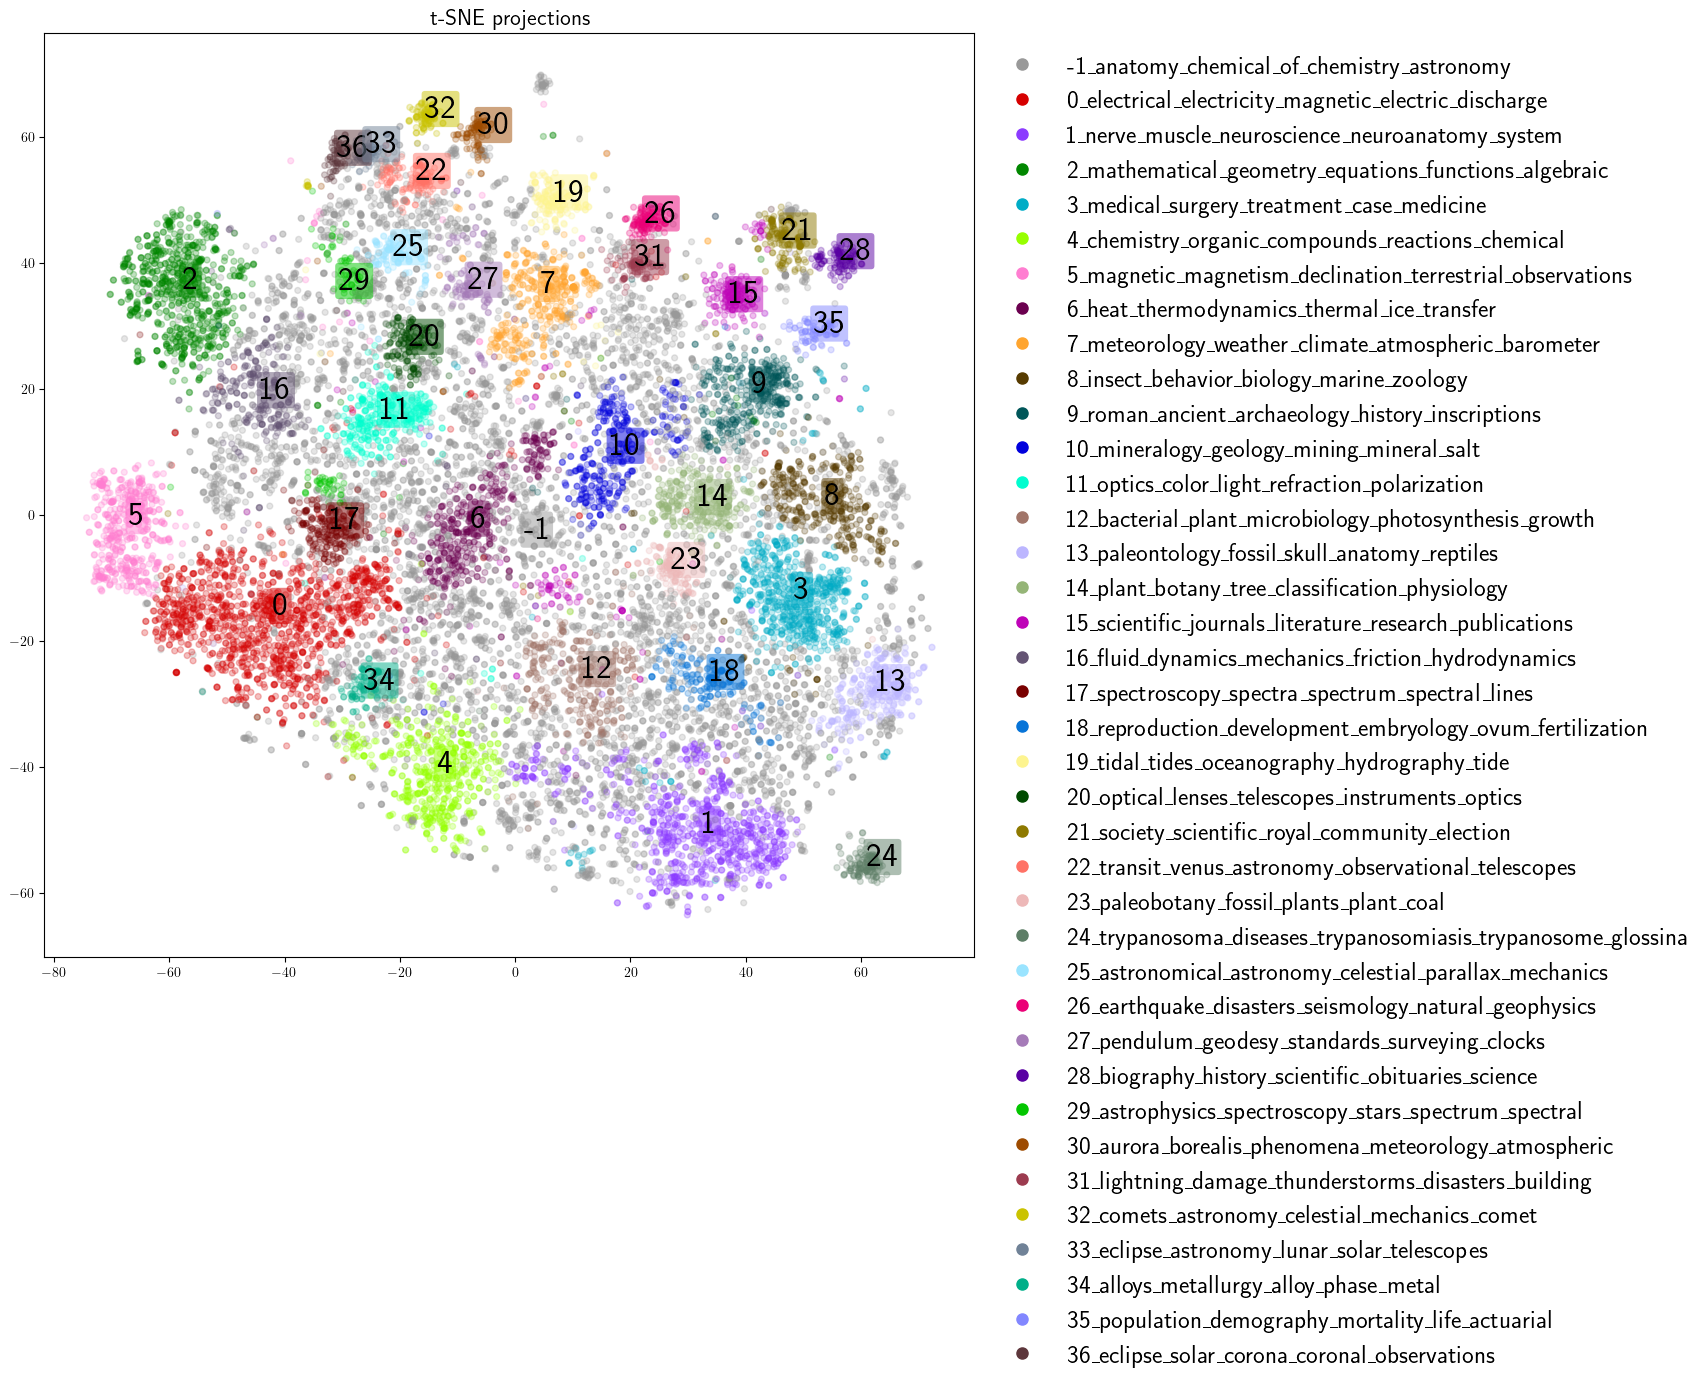

In [136]:
plot_embedding_2D(tsne_embeddings_8k,
    topics_8k,
    with_captions=True
) 